In [15]:
import pandas as pd
import seaborn as sn

T=pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\arbres_paris.csv', sep = ';', encoding = 'latin1')
T.head()

,DOMANIALITE,ARRONDISSEMENT,CIRCONFERENCE_cm,HAUTEUR_m,NOM,LAT,LON
0,CIMETIERE,SEINE-SAINT-DENIS,0.0,0.0,Marronnier,48.903017,2.410581
1,CIMETIERE,SEINE-SAINT-DENIS,70.0,8.0,Noisetier de Byzance,48.904429,2.351278
2,DASCO,PARIS 7,35.0,8.0,Bouleau,48.858418,2.299582
3,DASCO,PARIS 20,65.0,7.0,Marronnier,48.850862,2.406973
4,DASCO,PARIS 19,60.0,7.0,Savonnier,48.882507,2.375828


In [16]:
L = ['Frêne', 'Olivier', 'Bouleau', 'Noisetier de Byzance', 'Charme', 'Cyprès', 'Marier', 'Platane', 'Aulne']

In [17]:
def allergisant(nom):
    if nom in L:
        return 1
    else:
        return 0

In [18]:
T['Allergisant']=T['NOM'].apply(allergisant)
T.head()

,DOMANIALITE,ARRONDISSEMENT,CIRCONFERENCE_cm,HAUTEUR_m,NOM,LAT,LON,Allergisant
0,CIMETIERE,SEINE-SAINT-DENIS,0.0,0.0,Marronnier,48.903017,2.410581,0
1,CIMETIERE,SEINE-SAINT-DENIS,70.0,8.0,Noisetier de Byzance,48.904429,2.351278,1
2,DASCO,PARIS 7,35.0,8.0,Bouleau,48.858418,2.299582,1
3,DASCO,PARIS 20,65.0,7.0,Marronnier,48.850862,2.406973,0
4,DASCO,PARIS 19,60.0,7.0,Savonnier,48.882507,2.375828,0


In [19]:
T=T.query('0<HAUTEUR_m <20 and 0<CIRCONFERENCE_cm < 300')
T

,DOMANIALITE,ARRONDISSEMENT,CIRCONFERENCE_cm,HAUTEUR_m,NOM,LAT,LON,Allergisant
1,CIMETIERE,SEINE-SAINT-DENIS,70.0,8.0,Noisetier de Byzance,48.904429,2.351278,1
2,DASCO,PARIS 7,35.0,8.0,Bouleau,48.858418,2.299582,1
3,DASCO,PARIS 20,65.0,7.0,Marronnier,48.850862,2.406973,0
4,DASCO,PARIS 19,60.0,7.0,Savonnier,48.882507,2.375828,0
5,PERIPHERIQUE,PARIS 16,50.0,10.0,Alisier,48.859325,2.261566,0
...,...,...,...,...,...,...,...,...
222282,Jardin,PARIS 12,60.0,10.0,Tilleul,48.832959,2.383952,0
222283,Jardin,PARIS 14,160.0,17.0,Micocoulier,48.821948,2.335720,0
222284,Jardin,PARIS 16,70.0,12.0,Erable,48.851697,2.275765,0
222285,Jardin,PARIS 11,80.0,10.0,Sapin,48.854862,2.394407,0


In [20]:
R=T.groupby(['Allergisant','ARRONDISSEMENT']).mean(numeric_only=True)
R = R.reset_index()
R.head()

,Allergisant,ARRONDISSEMENT,CIRCONFERENCE_cm,HAUTEUR_m,LAT,LON
0,0,HAUTS-DE-SEINE,104.680000,10.296842,48.827810,2.295838
1,0,PARIS 1,76.880000,7.435000,48.861125,2.341419
2,0,PARIS 10,73.518231,9.169755,48.875545,2.361606
3,0,PARIS 11,74.885781,8.917249,48.859582,2.382257
4,0,PARIS 12,80.237384,8.837444,48.837623,2.415422


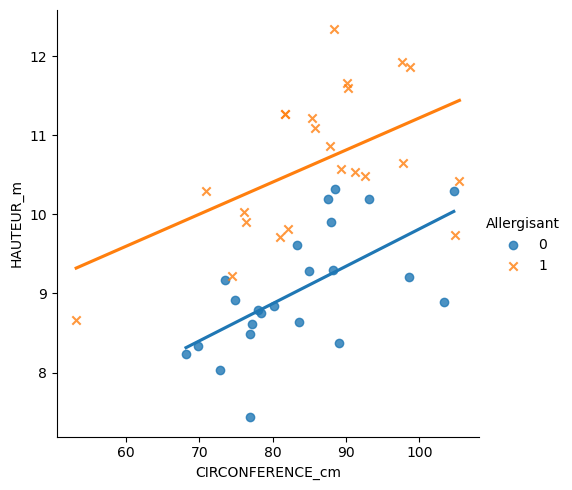

In [21]:
sn.lmplot(data=R,
         x='CIRCONFERENCE_cm',
         y='HAUTEUR_m',
         hue='Allergisant',
         ci=None,
         markers=['o','x'])

# model

In [22]:
from scipy.stats import linregress

In [24]:
M = R.query('Allergisant==1')
G = R.query('Allergisant==0')

In [25]:
X,Y=M['CIRCONFERENCE_cm'],M['HAUTEUR_m']
a,b,r=linregress(X,Y)[:3]
a,b,r

(0.04058378706885297, 7.160709357874591, 0.5133606430842668)

In [26]:
X,Y=G['CIRCONFERENCE_cm'],G['HAUTEUR_m']
a,b,r=linregress(X,Y)[:3]
a,b,r

(0.04718389989694183, 5.09763901789177, 0.6072085040486104)